In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\AI in Retail Dataset.csv",encoding='latin-1')
df

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,AI_Privacy_No_Trust,AI_Enhance_Experience,AI_Satisfication,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,YES,YES,Satisfied,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,YES,YES,Satisfied,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,YES,YES,Satisfied,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,YES,YES,Satisfied,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,YES,YES,Satisfied,YES,NO,NO,YES,YES,YES,NO,YES,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,CANADA,YES,Gen X,Medium,Female,Highschool Graduate,NO,Suburban Areas,YES,NO,YES,YES,Satisfied,NO,NO,NO,YES,NO,YES,YES,YES,YES,YES
652,CANADA,YES,Millennials,Medium High,Male,University Graduate,YES,Metropolitan,YES,YES,YES,YES,Satisfied,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES
653,CANADA,YES,Millennials,High,Female,University Graduate,YES,Metropolitan,YES,NO,YES,YES,Satisfied,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO
654,CANADA,YES,Millennials,High,Female,Highschool Graduate,YES,Suburban Areas,NO,YES,YES,YES,Satisfied,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES


In [3]:
df.info()
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    object
 12  AI_Satisfication      

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df['AI_Satisfication'].value_counts()

AI_Satisfication
Satisfied      529
Unsatisfied    119
Name: count, dtype: int64

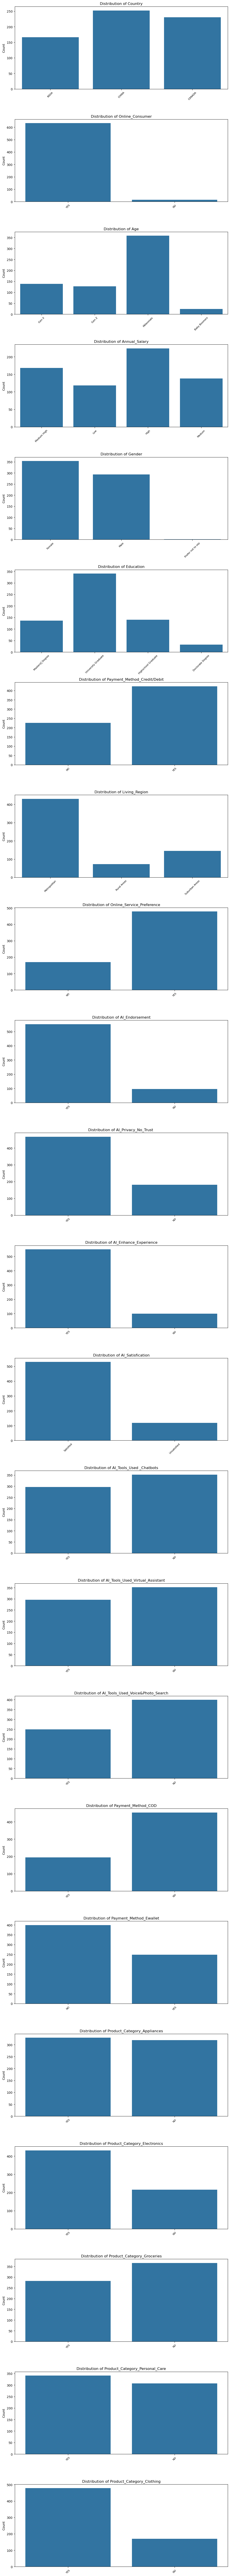

In [6]:
def analysis_graph(data):
    object_data_type = data.select_dtypes(include = ['object']).columns.to_list()
    numeric_data_type = data.select_dtypes(exclude = ['object']).columns.to_list()
    total_plots = max(len(object_data_type),len(numeric_data_type))
    plt.figure(figsize=(20, total_plots * 5))
    i = 0
    for idx,object_data in enumerate(object_data_type):
        i += 1
        plt.subplot(total_plots,2,idx*2+1)
        sns.countplot(data = data, x = object_data)
        plt.title(f"Distribution of {object_data}", fontsize = 12)
        plt.xlabel("")
        plt.ylabel("Count")
        plt.xticks(rotation = 45, fontsize = 8)
    for idx,numeric_data in enumerate(numeric_data_type):
        i += 1
        plt.subplot(total_plots,2,idx*2+2)
        sns.histplot(data=data, x = numeric_data, kde = True)
        plt.title(f"Distribution of {numeric_data}", fontsize = 12)
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.xticks(fontsize = 8)
    plt.tight_layout()
    plt.show()
def analysis_bivariate_graph(data):
    object_data_type = data.select_dtypes(include = ['object']).columns.to_list()
    numeric_data_type = data.select_dtypes(exclude = ['object']).columns.to_list()
    total_plots = len(object_data_type) * len(numeric_data_type)
    plt.figure(figsize=(20,total_plots*5))
    i = 0 
    for analysis in numeric_data_type:
        for hue in object_data_type:
            i += 1
            plt.subplot((total_plots//2) + (total_plots %2),2,i)
            sns.histplot(data=data, x = analysis, hue = hue, kde = False)
            plt.title(f"Distribution of {analysis} by {hue}", fontsize = 12)
            plt.xlabel("")
            plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
def analysis_boxplot(data):
    numeric_data_type = data.select_dtypes(exclude = ['object']).columns.to_list()
    total_plots = len(numeric_data_type)
    plt.figure(figsize=(20,total_plots))
    i = 0 
    for analysis in numeric_data_type:
        i += 1
        plt.subplot((total_plots//2)+1,2,i)
        sns.boxplot(data=data, x = analysis)
        plt.title(f"Boxplot of {analysis}", fontsize = 12)
        plt.xlabel("")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()
def correlation_analysis(data):
    numeric_data_type = df.select_dtypes(exclude=['object']).columns.to_list()
    total_plots = len(numeric_data_type)**2
    plt.figure(figsize=(20,(total_plots//2)*4))
    i = 0
    for cor1 in numeric_data_type:
        for cor2 in numeric_data_type:
            i += 1
            plt.subplot((total_plots//2)+1,2,i)
            sns.scatterplot(data = data, x = cor1, y = cor2)
            plt.title(f"Correlation between {cor1} and {cor2}")
            plt.xlabel(cor1)
            plt.ylabel(cor2)
    plt.tight_layout()
    plt.show()
analysis_graph(df)

In [7]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
def encoder(data):
    data = data.copy()
    object_data_type = data.select_dtypes(include = ['object']).columns
    encoders = {}
    for i in object_data_type:
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])
        encoders[i] = le
    return data,encoders
encoded_data,encoders = encoder(df)
encoders

{'Country': LabelEncoder(),
 'Online_Consumer': LabelEncoder(),
 'Age': LabelEncoder(),
 'Annual_Salary': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Education': LabelEncoder(),
 'Payment_Method_Credit/Debit': LabelEncoder(),
 'Living_Region': LabelEncoder(),
 'Online_Service_Preference': LabelEncoder(),
 'AI_Endorsement': LabelEncoder(),
 'AI_Privacy_No_Trust ': LabelEncoder(),
 'AI_Enhance_Experience': LabelEncoder(),
 'AI_Satisfication': LabelEncoder(),
 'AI_Tools_Used _Chatbots': LabelEncoder(),
 'AI_Tools_Used_Virtual_Assistant': LabelEncoder(),
 'AI_Tools_Used_Voice&Photo_Search': LabelEncoder(),
 'Payment_Method_COD': LabelEncoder(),
 'Payment_Method_Ewallet': LabelEncoder(),
 'Product_Category_Appliances': LabelEncoder(),
 'Product_Category_Electronics': LabelEncoder(),
 'Product_Category_Groceries': LabelEncoder(),
 'Product_Category_Personal_Care': LabelEncoder(),
 'Product_Category_Clothing': LabelEncoder()}

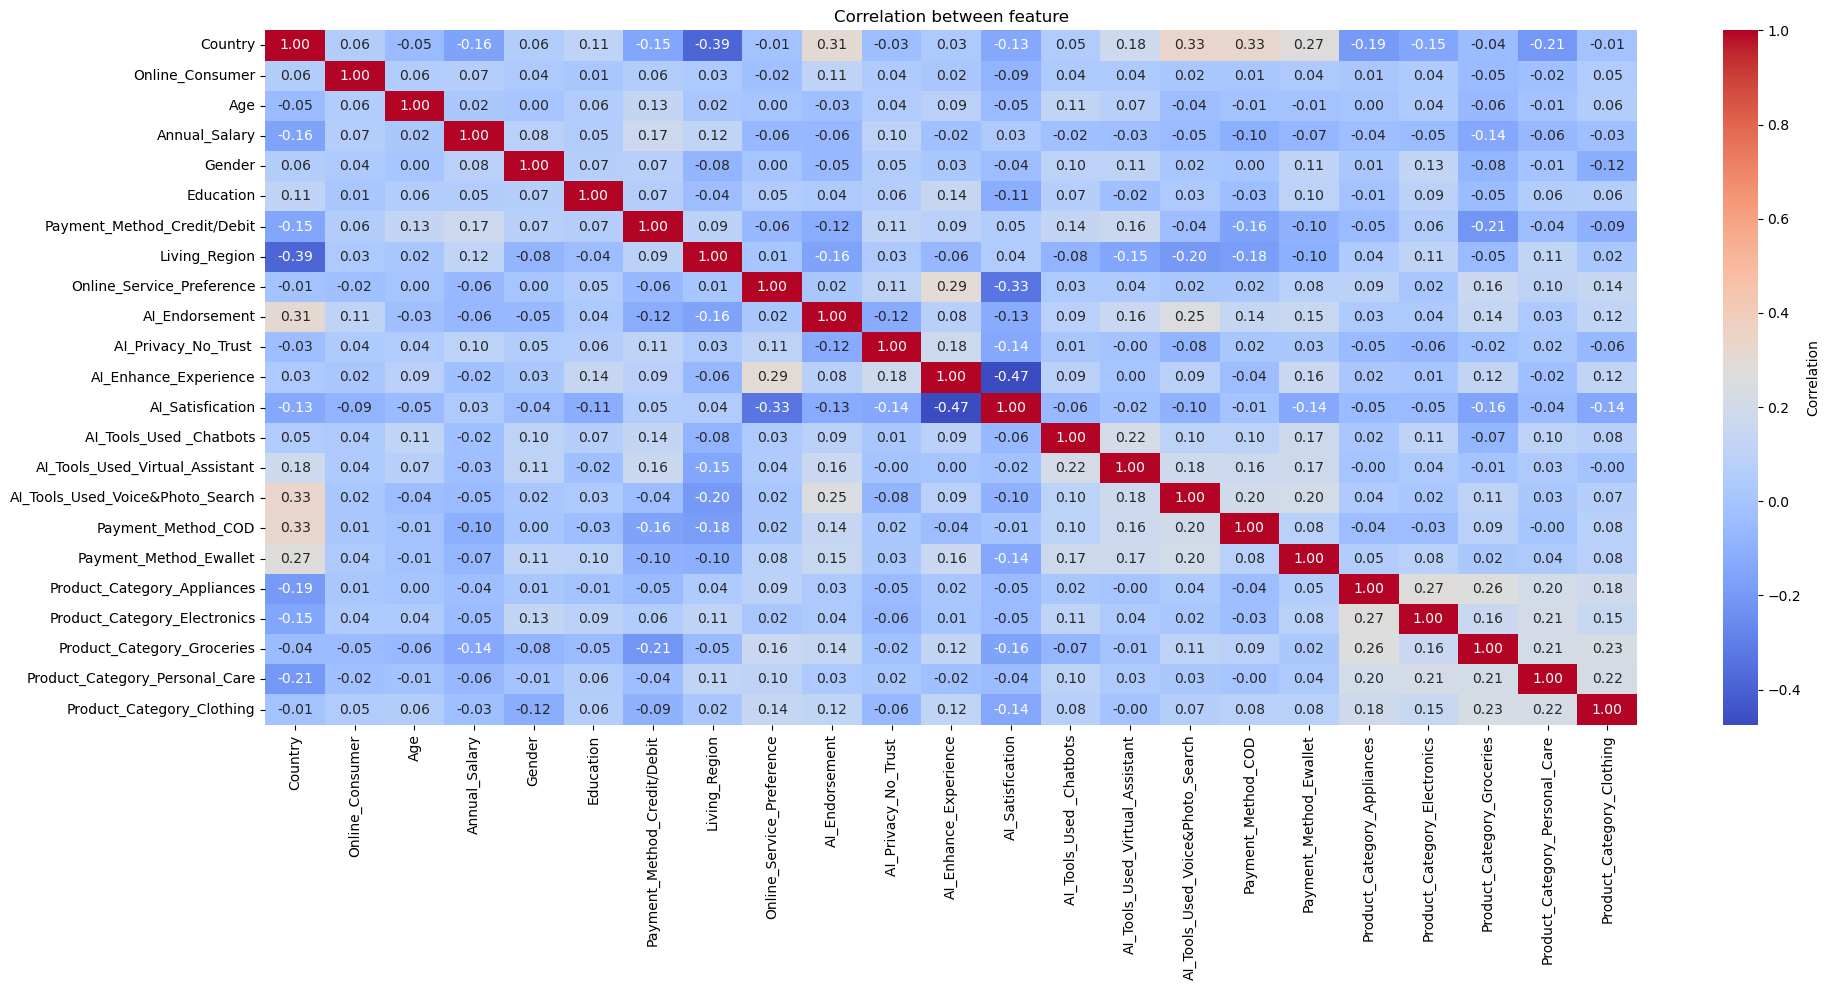

In [9]:
plt.figure(figsize=(20,10))
correlation_matrix = encoded_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Correlation between feature')
plt.tight_layout()
plt.show()

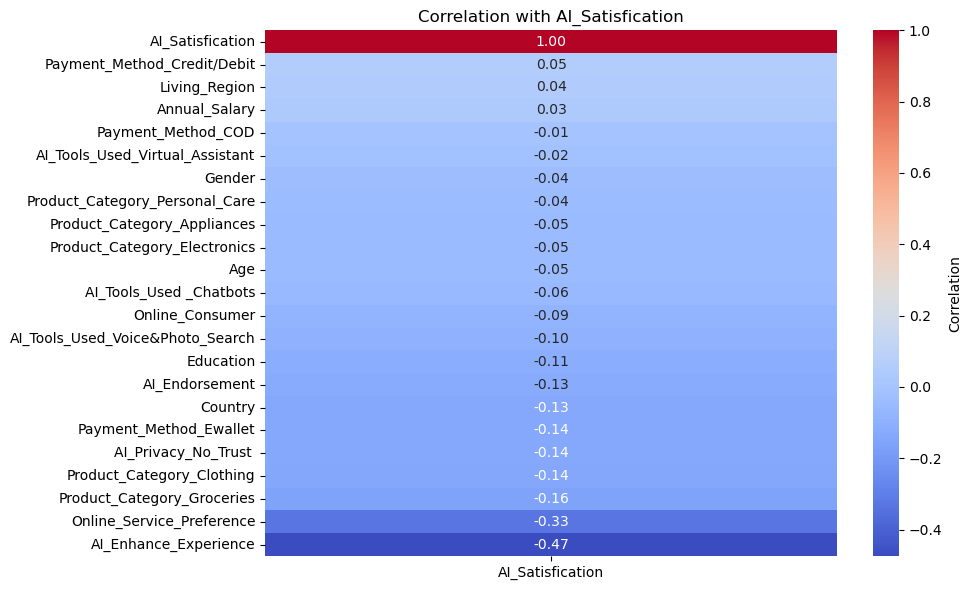

In [10]:
# AI Satisfaction as label/target
correlation_matrix = encoded_data.corr()
motivation_corr = correlation_matrix['AI_Satisfication'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sorted_corr = correlation_matrix.loc[motivation_corr.index, motivation_corr.index]
sns.heatmap(sorted_corr[['AI_Satisfication']], annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Correlation with AI_Satisfication')
plt.tight_layout()
plt.show()

In [12]:
!pip install torchinfo

In [13]:
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
# remove columns that have zero correlation with target
x = encoded_data.drop(columns=["AI_Satisfication"]).to_numpy()
y = encoded_data[['AI_Satisfication']].to_numpy()
feature_scaler = MinMaxScaler()
label_scaler = MinMaxScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2, shuffle = True)
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)
smote = SMOTE(random_state=42)
y_train,y_test = y_train.squeeze(),y_test.squeeze()
x_train,y_train = smote.fit_resample(x_train,y_train)
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype =torch.float32).long()
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype =torch.float32).long()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([860, 22])
torch.Size([860])
torch.Size([130, 22])
torch.Size([130])


In [14]:
class classification_nn(nn.Module):
    def __init__(self,feature, num_classes):
        super(classification_nn,self).__init__()
        self.dense1 = nn.Linear(feature.shape[1], 128)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        
        self.dense2 = nn.Linear(128, 64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        
        self.dense3 = nn.Linear(64, 32)
        self.batchnorm3 = nn.BatchNorm1d(32)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)
        
        self.dense4 = nn.Linear(32, 16)
        self.batchnorm4 = nn.BatchNorm1d(16)
        self.relu4 = nn.ReLU()
        
        self.output = nn.Linear(16, num_classes) 
        
    def forward(self, x):
        x = self.dense1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.dense2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.dense3(x)
        x = self.batchnorm3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        
        x = self.dense4(x)
        x = self.batchnorm4(x)
        x = self.relu4(x)
        
        x = self.output(x)
        return x
    
model = classification_nn(x_train,len(encoders['AI_Satisfication'].classes_))    
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
summary(model)

Layer (type:depth-idx)                   Param #
classification_nn                        --
├─Linear: 1-1                            2,944
├─BatchNorm1d: 1-2                       256
├─ReLU: 1-3                              --
├─Dropout: 1-4                           --
├─Linear: 1-5                            8,256
├─BatchNorm1d: 1-6                       128
├─ReLU: 1-7                              --
├─Dropout: 1-8                           --
├─Linear: 1-9                            2,080
├─BatchNorm1d: 1-10                      64
├─ReLU: 1-11                             --
├─Dropout: 1-12                          --
├─Linear: 1-13                           528
├─BatchNorm1d: 1-14                      32
├─ReLU: 1-15                             --
├─Linear: 1-16                           34
Total params: 14,322
Trainable params: 14,322
Non-trainable params: 0

In [15]:
patience = 8 # maks epochs before if overfitting
best_val_loss = float('inf')
best_accuracy = float('inf')
early_step_counter = 0
train_loss = 0.0
#accuracy_score
def accuracy_score(outputs,labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

for epochs in range(20000):
    #train
    model.train()
    # Forward 
    y_pred_train = model(x_train)
    loss = criterion(y_pred_train, y_train)

    # Backward 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

    #validation
    if (epochs + 1) % 2000 == 0:
        model.eval()
        val_loss = 0.0
        accuracy = 0.0
        with torch.no_grad():
            output_val = model(x_test)
            val_loss += criterion(output_val,y_test)
            accuracy += accuracy_score(output_val,y_test)
        print(f"Epoch [{epochs + 1}/20000], Training Loss: {train_loss / (epochs + 1):.4f}, "
            f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")
        #early stopping if overfitting
        if accuracy <best_accuracy:
            best_accuracy = accuracy
            early_step_counter = 0
            torch.save(model,"best_model_student_motivation_classification.pth")
            print(f"New best model saved with Accuracy: {accuracy:.4f}")
        else:
            early_step_counter += 1
            print(f"No improvement in Accuracy for {early_step_counter} steps")
        if early_step_counter >= patience:
            print("Overfitting!")
            break

Epoch [2000/20000], Training Loss: 0.2198, Validation Loss: 0.6075, Accuracy: 0.7923
New best model saved with Accuracy: 0.7923
Epoch [4000/20000], Training Loss: 0.1242, Validation Loss: 0.8642, Accuracy: 0.8000
No improvement in Accuracy for 1 steps
Epoch [6000/20000], Training Loss: 0.0864, Validation Loss: 1.0578, Accuracy: 0.8000
No improvement in Accuracy for 2 steps
Epoch [8000/20000], Training Loss: 0.0662, Validation Loss: 1.1976, Accuracy: 0.8000
No improvement in Accuracy for 3 steps
Epoch [10000/20000], Training Loss: 0.0537, Validation Loss: 1.3488, Accuracy: 0.8000
No improvement in Accuracy for 4 steps
Epoch [12000/20000], Training Loss: 0.0452, Validation Loss: 1.4737, Accuracy: 0.8077
No improvement in Accuracy for 5 steps
Epoch [14000/20000], Training Loss: 0.0390, Validation Loss: 1.5597, Accuracy: 0.7923
No improvement in Accuracy for 6 steps
Epoch [16000/20000], Training Loss: 0.0343, Validation Loss: 1.6135, Accuracy: 0.7923
No improvement in Accuracy for 7 steps
